##### Time Series

###### Objective
Based on the data from 

spurious correlation  - 2 series of values which are completely unrelated, however shows a higher correlation between one other. 

When looking at correlation always look at the percentage change and not the actual value aganist one another. 

Why we add 1 to the intercept before applying the linear model ? 
reason - the model will assume there is no intercept hence we would need to provide a value in this case 1 as the intercept. 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

In [2]:
import os
os.chdir('C:\\Users\\bhara\\PycharmProjects\\TimeSeries')

In [3]:
weather_file = 'Fort_Lauderdale.csv'
path=os.path.join(os.getcwd(),weather_file)
weather_file = open(path)
weather_data = weather_file.read()
weather_file.close()
print(len(weather_data))

1289770


In [4]:
lines = weather_data.split('\n')

In [5]:
print(len(lines))

23789


In [6]:
labels = lines[0]
values = lines[1:]
n_values = len(values)

In [7]:
# split the list of comma separated strings
year = []
month = []
day = []
max_temp = []

In [8]:
# take out the column values and put them into the list
c_year = 1
c_month = 2
c_day = 3
c_max_temp = 5

In [9]:
for irow in range(n_values):
    split_values = values[irow].split(',')
    year.append(int(split_values[c_year]))
    month.append(int(split_values[c_month]))
    day.append(int(split_values[c_day]))
    max_temp.append(float(split_values[c_max_temp]))
    
# plt.plot(max_temp)
# plt.show()

In [10]:
temp_half = len(max_temp) // 2
temps = np.array(max_temp[temp_half:])
temps[np.where(temps == -99.9)] = np.nan

<IPython.core.display.Javascript object>


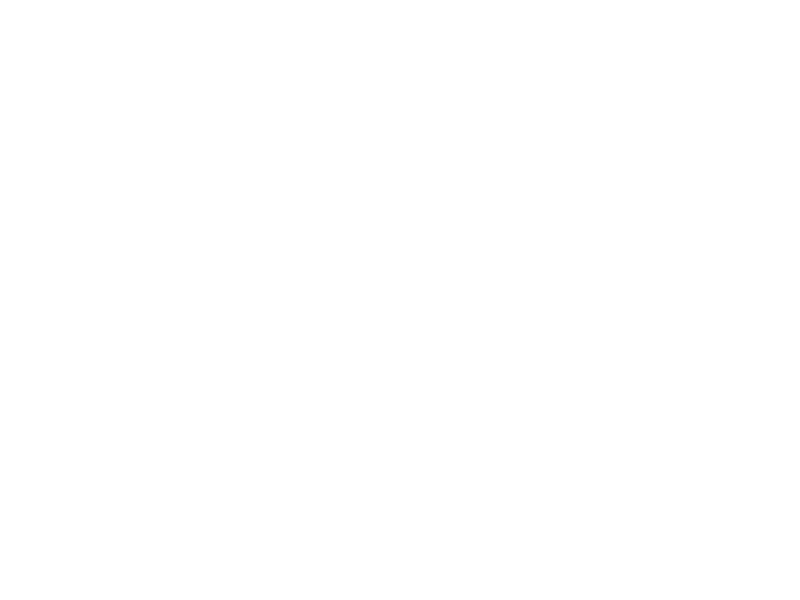

In [11]:
plt.close()
plt.plot(temps,color='white',marker='.',linestyle=None)
plt.show()

In [12]:
print(np.where(np.isnan(temps))[0])

[    0     1     2 ... 11785 11786 11807]


In [13]:
print(np.where(np.logical_not(np.isnan(temps)))[0])

[ 5155  5156  5157 ... 11891 11892 11893]


In [14]:
start = np.where(np.logical_not(np.isnan(temps)))[0][0]

In [15]:
print(start)

5155


In [16]:
temps = temps[start:]

In [17]:
temps[0]

91.0

In [18]:
difference = np.where(np.isnan(temps))[0]

In [19]:
print(np.diff(difference)[:20])

[  7   4  10   8  66  55 229   1   1  13   1 448  39 366  73   4 289 553
   1   1]


In [20]:
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i -1]

<IPython.core.display.Javascript object>


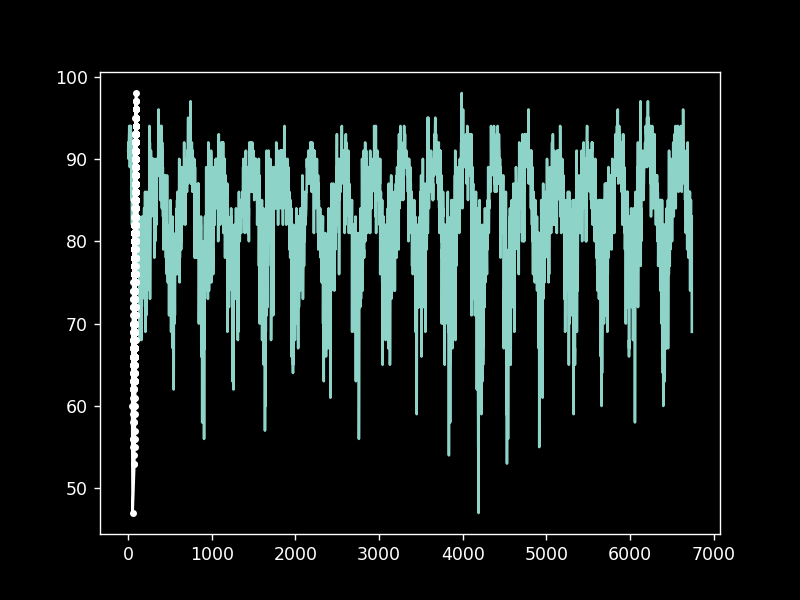

In [21]:
plt.close()
plt.plot(temps)
plt.show()

<IPython.core.display.Javascript object>


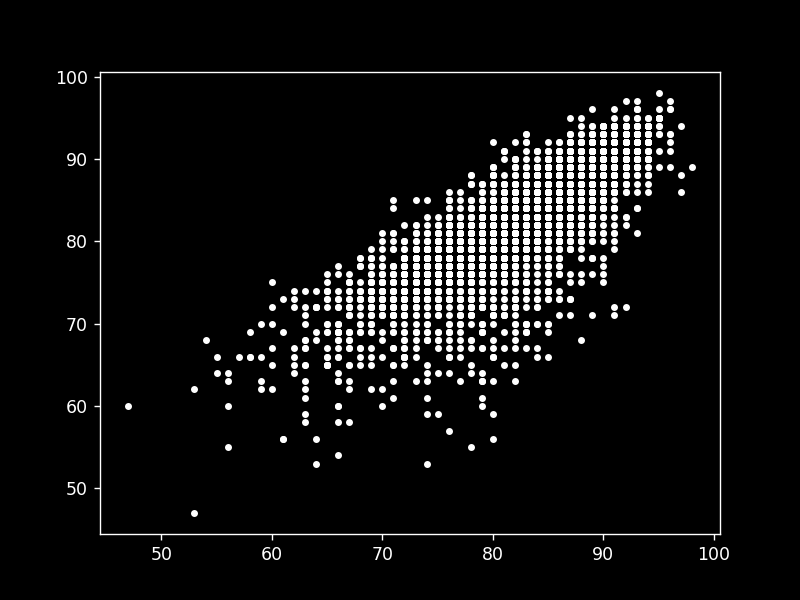

In [38]:
plt.close()
plt.plot(temps[:-1],temps[1:],color='white',linestyle='',marker='.')
plt.show()

In [48]:
# adding jitter 
def scatter_jitter(x,y):
    x_jitter = x + np.random.normal(size=x.size, scale=0.5)
    y_jitter = y + np.random.normal(size=y.size, scale=0.5)
    plt.close()
    plt.plot(x_jitter,y_jitter,color='white',alpha=0.3,marker='.',linestyle='')
    plt.show()

<IPython.core.display.Javascript object>


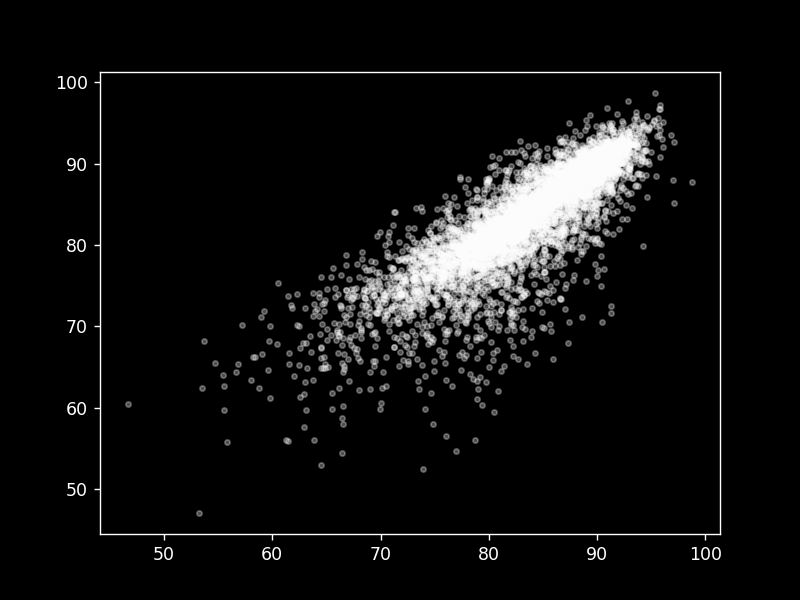

In [54]:
shift = 1
scatter_jitter(temps[:-shift],temps[shift:])

In [55]:
print(np.corrcoef(temps[:-shift],temps[shift:]))

[[1.         0.85079698]
 [0.85079698 1.        ]]


In [68]:
autocorr = []
for shift in range(1,1000):
    correlation = np.corrcoef(temps[:-shift],temps[shift:])[0][1]
    autocorr.append(correlation)

<IPython.core.display.Javascript object>


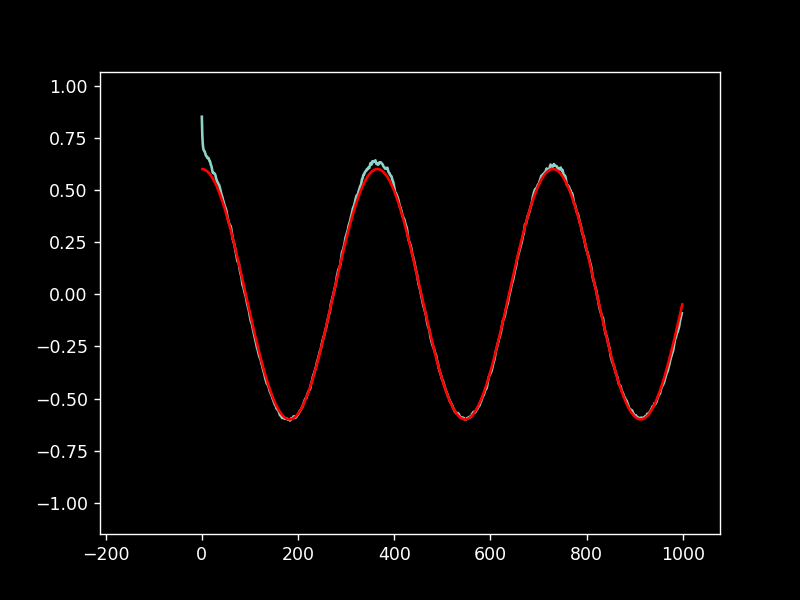

In [69]:
plt.close()
plt.plot(autocorr)
plt.show()

Adding the sign wave to the above plot

In [70]:
d = np.arange(1,1000)
fit = 0.6 * np.cos(2 * np.pi* d / 365)
plt.plot(d,fit,color='red')
plt.show()

annual trend shows clear domination over the weather data. 
we take annual trend as the feature. 

We calculate the median for a 10 day range for each day for the entire year. 